In [ ]:
# IMPORT DES LIBRAIRIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)

<module 'func' from '/Users/bastienalbizzati/Python/Projets-Git/2025-projet-S2-MMA-analyse-image/func.py'>

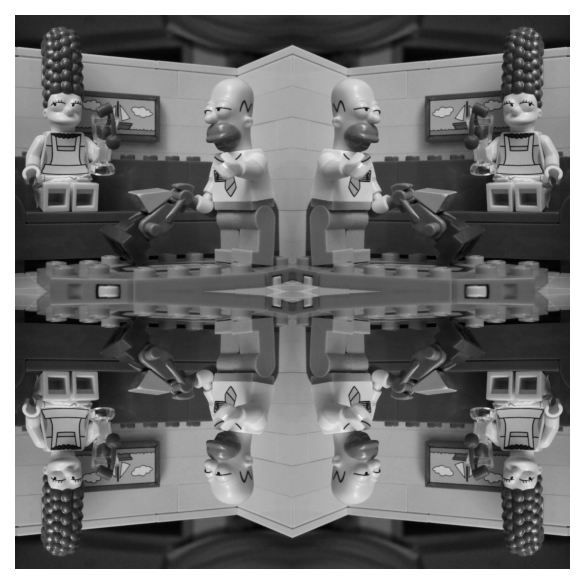

In [50]:
# Ouvrir l'image
p = plt.imread('simpson512g.png')
p4 = f.period_im(p)
M,N = p4.shape

# Affichage
plt.figure(dpi=150)
plt.imshow(p4,cmap='gray')
plt.axis('off')
plt.show()

In [54]:
romega = 1 # rayon de la fenêtre
nomega = (1 + 2*romega)**2 # nombre de pixels dans la fenêtre
epsilon = 0.1 # paramètre de régularisation

k1 = 5000
k2 = 5000
uw = f.extract_w(p4, k1, k2, romega)


In [55]:
I = p4
a = np.zeros((M,N))
b = np.zeros((M,N))
for x in range(M):
    for y in range(N):
        Iw = f.extract_w(I, x, y, romega)
        p4w = f.extract_w(p4, x, y, romega)
        muk = np.mean(Iw)
        sigmak2 = np.var(Iw)
        pbarrek = np.mean(p4w)
        a[x,y] = ((1/nomega) * np.sum(Iw*p4w) - muk * pbarrek)/(sigmak2 + epsilon)
        b[x,y] = pbarrek - a[x,y] * muk

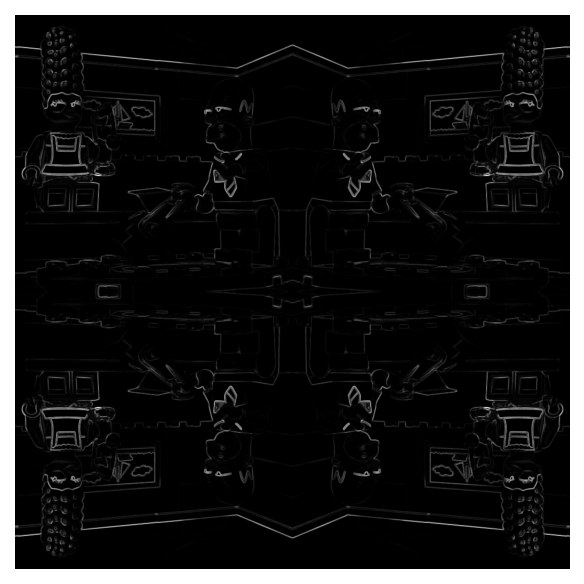

In [56]:
# Affichage
plt.figure(dpi=150)
plt.imshow(a,cmap='gray')
plt.axis('off')
plt.show()